In [2]:
import ast
import pandas as pd 
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns

#Loading dataset 
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()


In [3]:
#data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Filter for India Data analyst roles

In [4]:
df_ind_da=df[(df['job_country']=="India")&(df['job_title_short']=='Data Analyst')].copy()
df_ind_da['job_location']=df_ind_da['job_location'].replace("India","Anywhere In India")

In [5]:
df_plot=df_ind_da['job_location'].value_counts().head(10).to_frame()
df_plot

,count
job_location,
Anywhere In India,2056
"Hyderabad, Telangana, India",1289
Anywhere,1052
"Bengaluru, Karnataka, India",355
"Maharashtra, India",203
"Mumbai, Maharashtra, India",133
"Pune, Maharashtra, India",119
"Gurugram, Haryana, India",108
"Chennai, Tamil Nadu, India",106


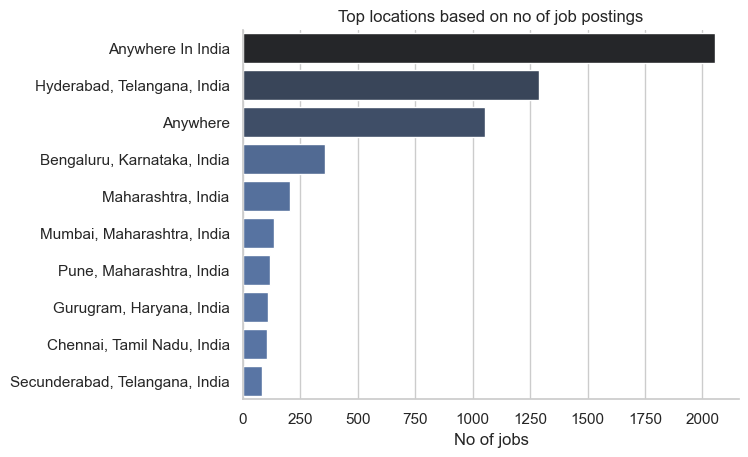

In [ ]:
sns.set_theme(style="whitegrid")
sns.barplot(df_plot,x='count',y='job_location',hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.ylabel('')
plt.xlabel('No of jobs')
plt.title('Top locations based on no of job postings')
plt.show()

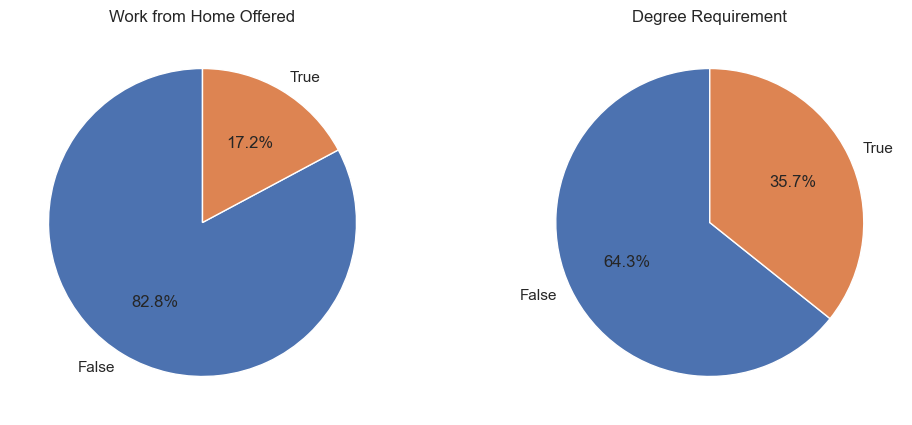

In [45]:

dict_column = {
'job_work_from_home':'Work from Home Offered',
'job_no_degree_mention':'Degree Requirement',
}
fig,ax =plt.subplots(1, 2)
fig.set_size_inches((12, 5))


for i,(column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_ind_da[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)


plt.show()

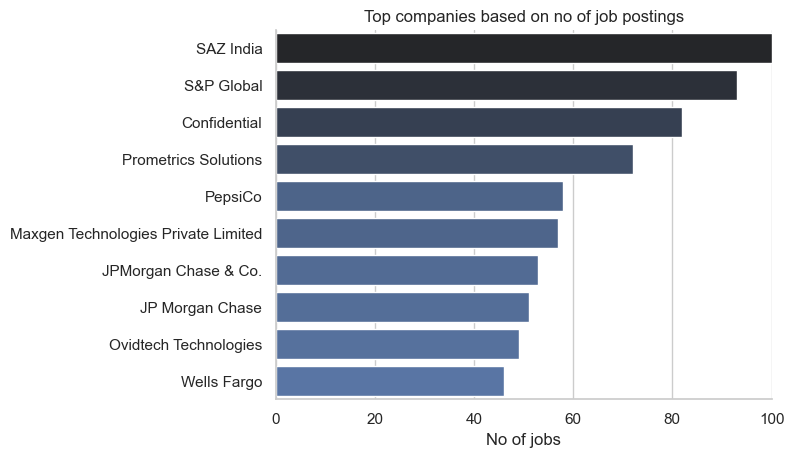

In [54]:
df_plot=df_ind_da['company_name'].value_counts().head(10).to_frame()
df_plot
sns.set_theme(style="whitegrid")
sns.barplot(df_plot,x='count',y='company_name',hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.ylabel('')
plt.xlabel('No of jobs')
plt.title('Top companies based on no of job postings')
plt.xlim(0,100)
plt.show()